Machine Intelligence 2 - Exercise 6 - Maximizing Nongaussianity

Group : Poulami Ghosh, Julie Morgan, Bramantyo Supriyatno 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy.linalg import eig, eigh
from scipy.io import loadmat

sns.set(style="white", context="paper", palette="pastel")
plt.style.use('seaborn')

In [2]:
data = loadmat('distrib.mat')
data_normal = data['normal']
data_laplacian = data['laplacian']
data_uniform = data['uniform']

In [3]:
def plot_data(data, title='Ditribution of Data', binwidth = 0.25):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    fig = plt.figure(figsize=(8, 8))
    fig.suptitle(title)

    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)

    x = data[0]
    y = data[1] 

    xymax = max(np.max(x), np.max(y))
    upper_lim = (int(xymax/binwidth) + 1) * binwidth

    xymin = min(np.min(x), np.min(y))
    lower_lim = (int(xymin/binwidth) + 1) * binwidth

    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    ax.scatter(x, y)
    ax.set_xlabel('first source')
    ax.set_ylabel('second source')

    bins = np.arange(lower_lim, upper_lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histx.set_ylabel('count')
    ax_histy.hist(y, bins=bins, orientation='horizontal')

    ax_histy.set_xlabel('count')
    plt.show()

In [4]:
def plot_kurtosis(angles, kurtosis, title='Kurtosis Plot'):
    
    plt.title(title)
    ang = np.array(angles)/np.pi
    plt.plot(ang, kurtosis[0,:], label='first dimension')
    plt.plot(ang, kurtosis[1,:], label='second dimension')
    plt.xlabel('angles (pi)')
    plt.ylabel('kurtosis')
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

In [5]:
def get_rotation_matrix(angle):
    return np.array([
            [np.cos(angle), -np.sin(angle)],
            [np.sin(angle), np.cos(angle)]
        ])

In [6]:
mixing_mat = np.array([[4, 3], [2, 1]])

def process(data, a_mat = mixing_mat): 
    plot_data(data, 'raw data')

    #mixing
    mixed = mixing_mat @ data
    plot_data(mixed, 'mixed')
    
    #centering   
    mean = np.mean(mixed, axis=1).reshape((-1,1))
    normalized = mixed - mean 
    plot_data(normalized, 'normalized')
    
    #assert(np.abs(np.mean(normalized)) <=1e-6)
    
    # PCA
    var = np.var(normalized)
    cov = np.cov(normalized)
    
    e_val, e_vec = eig(cov)

    #order = np.argsort(-1*e_val)
    #e_val = e_val[order]
    #e_vec = e_vec[:,order]

    projected = e_vec.T @ normalized 

    plot_data(projected, 'projected')

    #whitening

    # diagonal = np.diag(1 /np.sqrt(e_val))
    diagonal = np.diag(np.sqrt(e_val))
    inv_diagonal = np.linalg.inv(diagonal)
    whitened = inv_diagonal @ projected

    plot_data(whitened, 'whitened')

    angles = np.arange(0, 2*np.pi, np.pi/50).tolist()

    kurtosis = np.zeros((2, len(angles)))
    for i, angle in enumerate(angles):
        rotation_mat = get_rotation_matrix(angle)

        x_theta = rotation_mat @ whitened 

        kurtosis[:, i] = np.mean(np.power(x_theta,4), axis=1) - 3

    plot_kurtosis(angles, kurtosis)

    min_idx = np.argmin(kurtosis, axis=1)
    max_idx = np.argmax(kurtosis, axis=1)

    min_kurt = kurtosis[0, min_idx[0]]
    max_kurt = kurtosis[0, max_idx[0]]

    max_x_theta = get_rotation_matrix(max_kurt) @ x_theta
    plot_data(max_x_theta, 'Maximum Kurtosis')
    min_x_theta = get_rotation_matrix(min_kurt) @ x_theta
    plot_data(min_x_theta, 'Minimum Kurtosis')


<b>Normal Distribution</b>

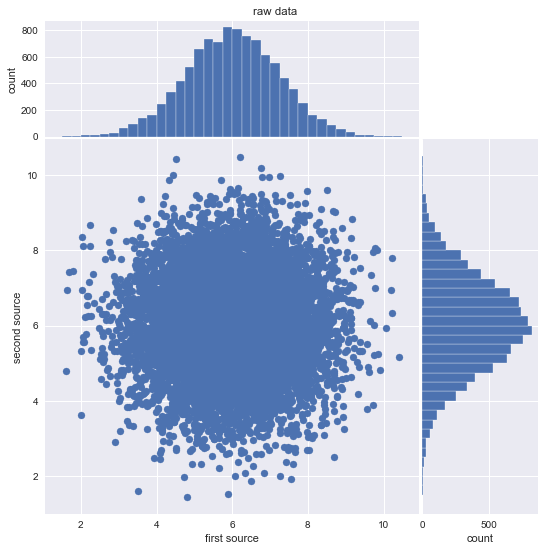

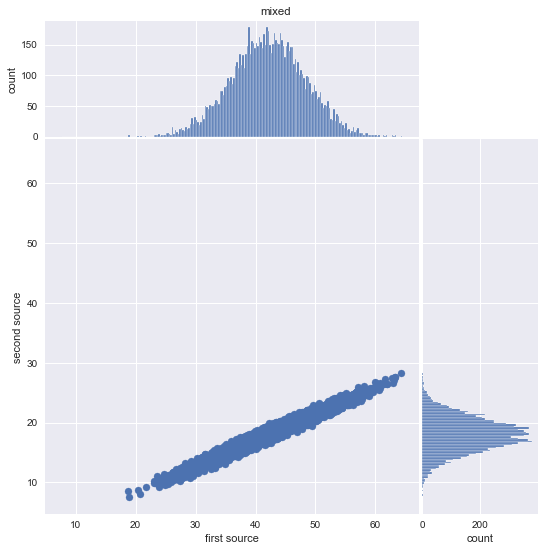

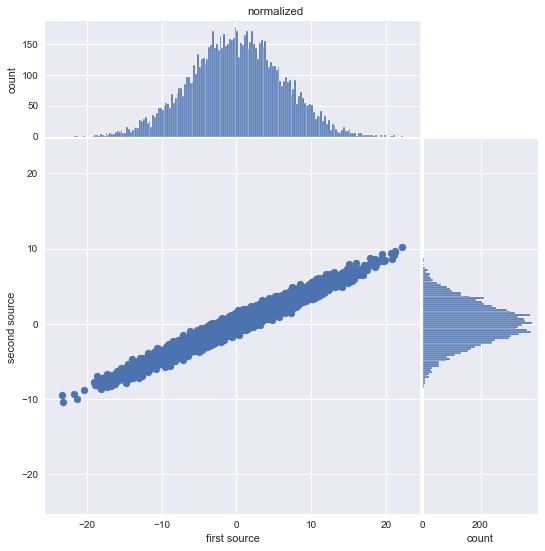

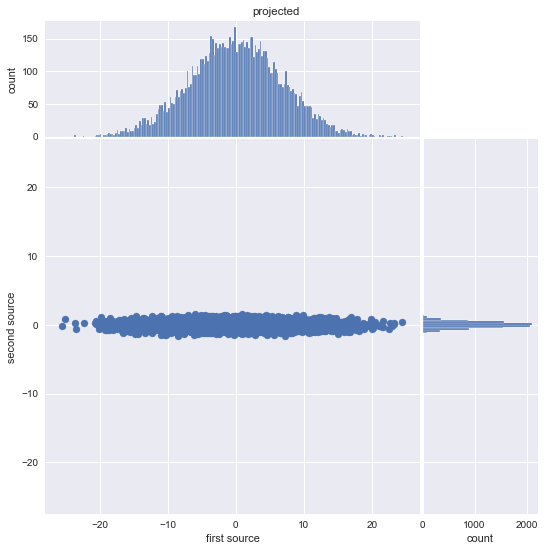

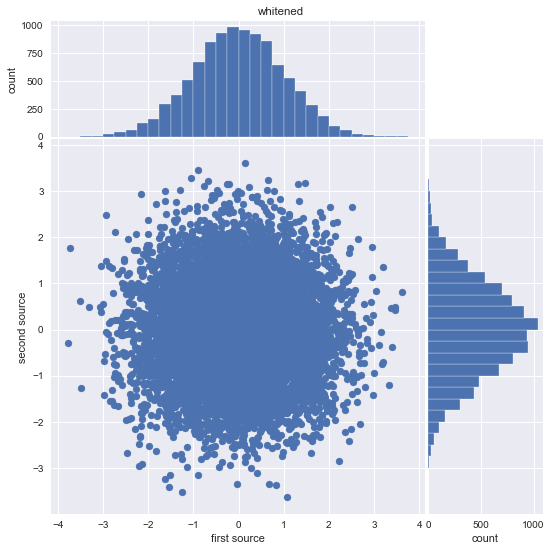

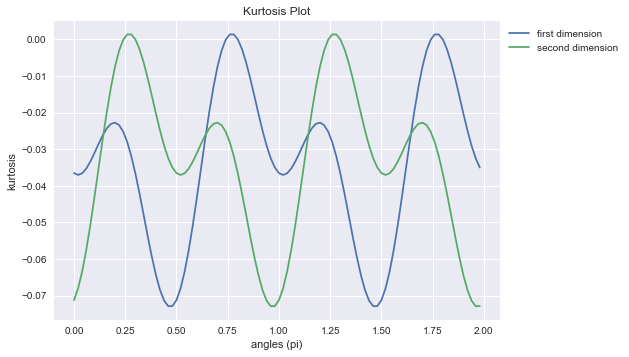

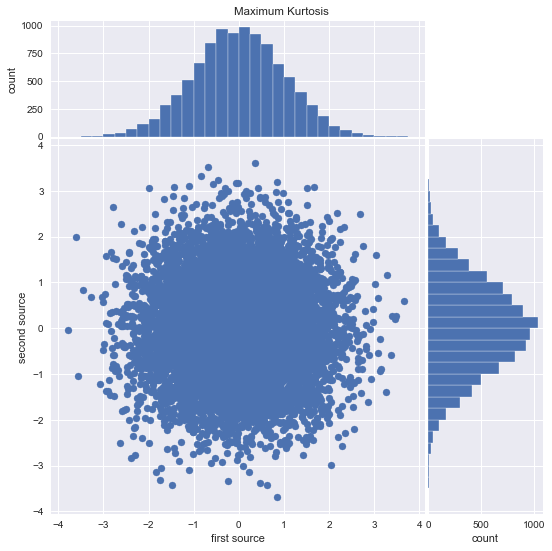

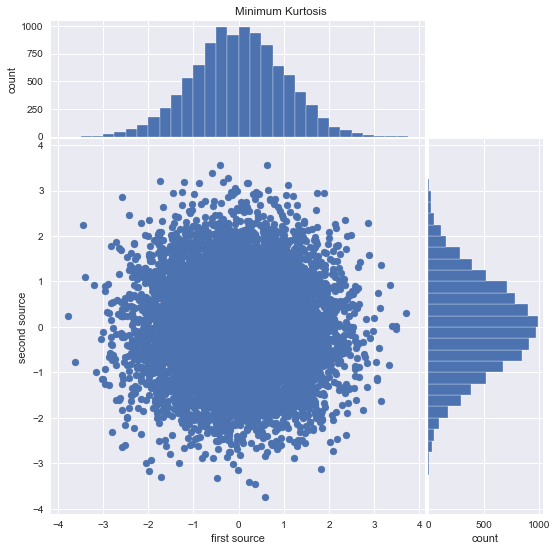

In [7]:
process(data_normal)

<b>Uniform Distribution</b>

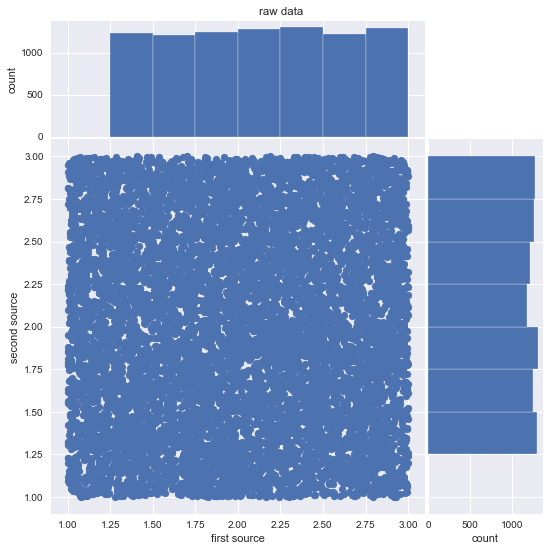

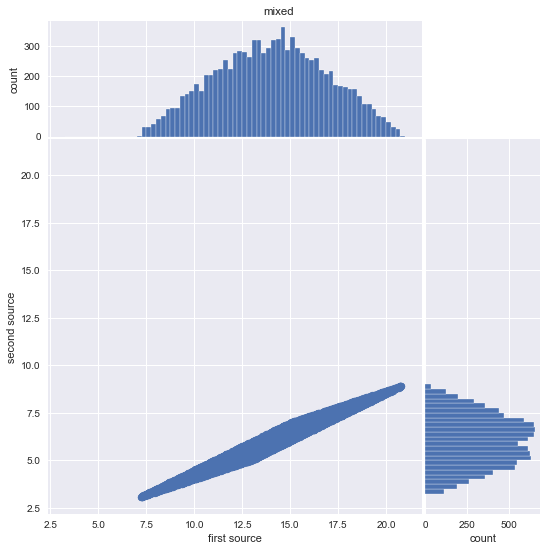

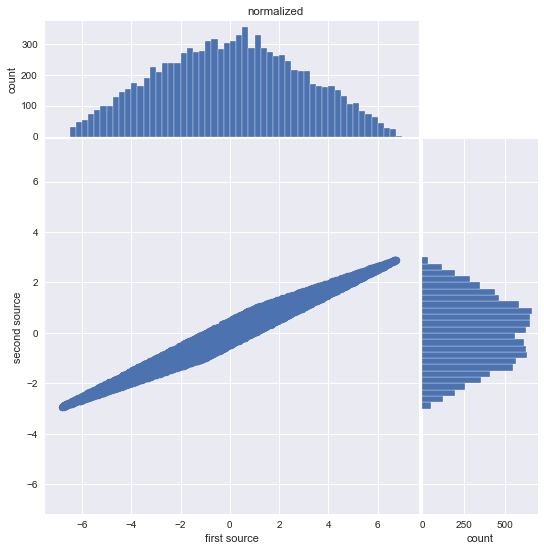

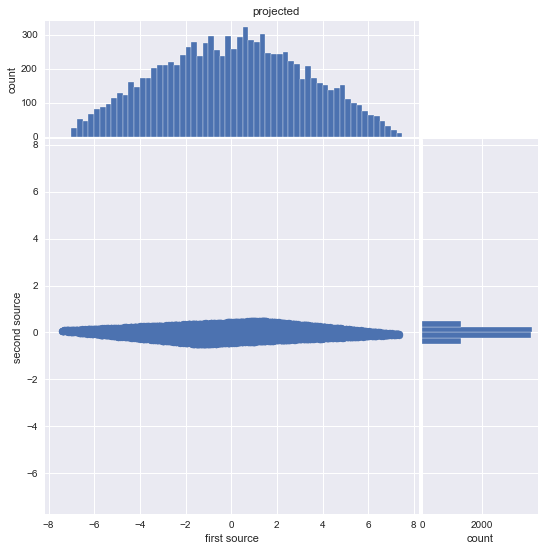

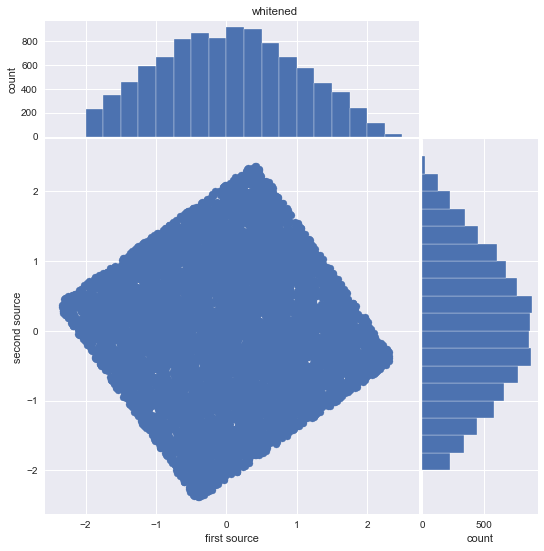

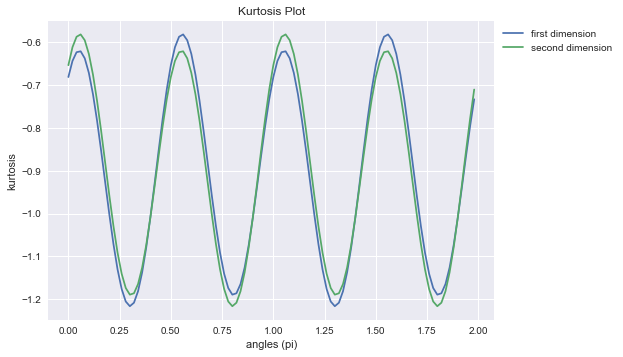

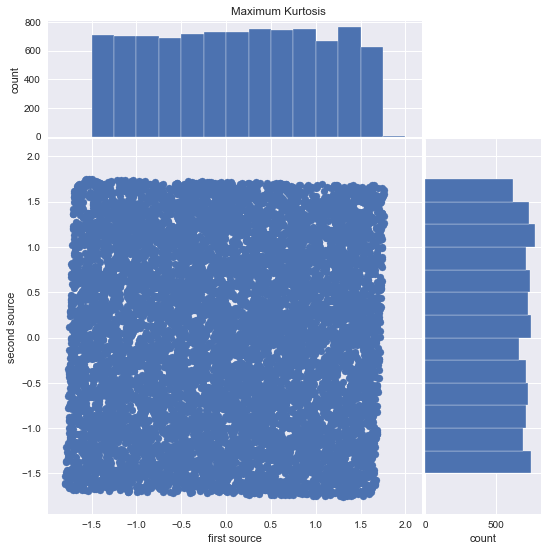

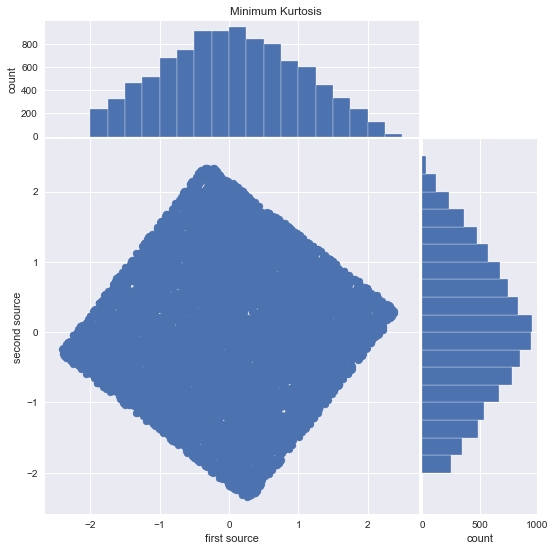

In [8]:
process(data_uniform)

<b>Laplacian Distribution</b>

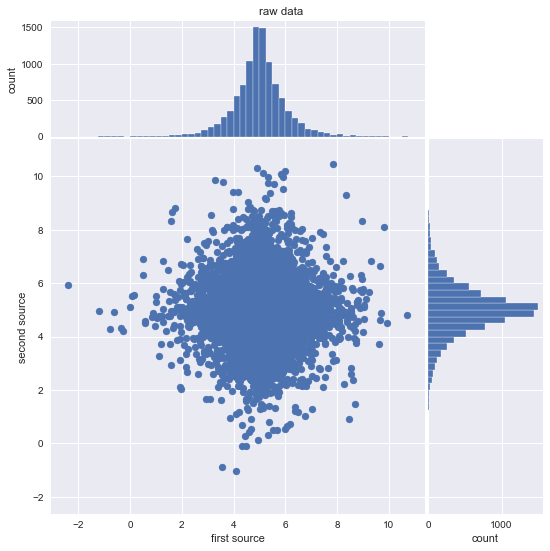

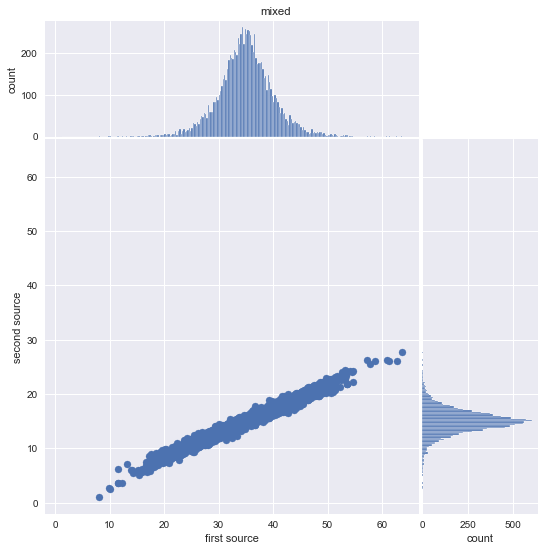

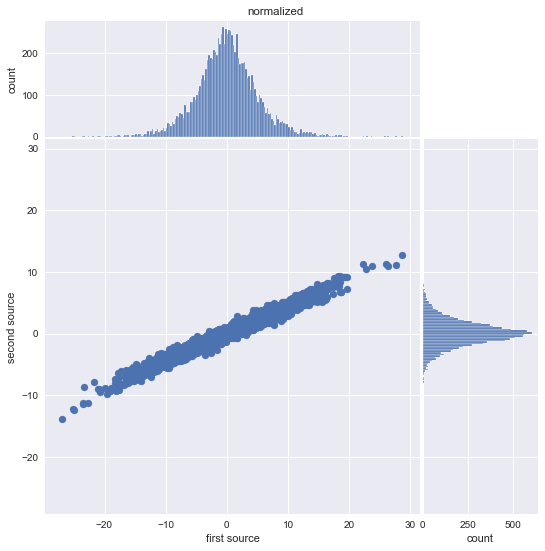

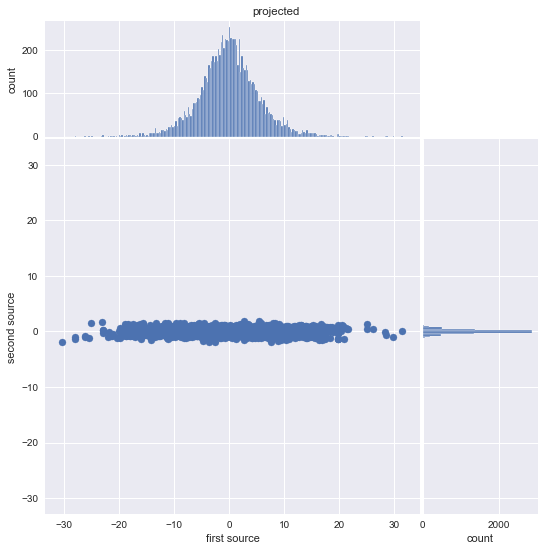

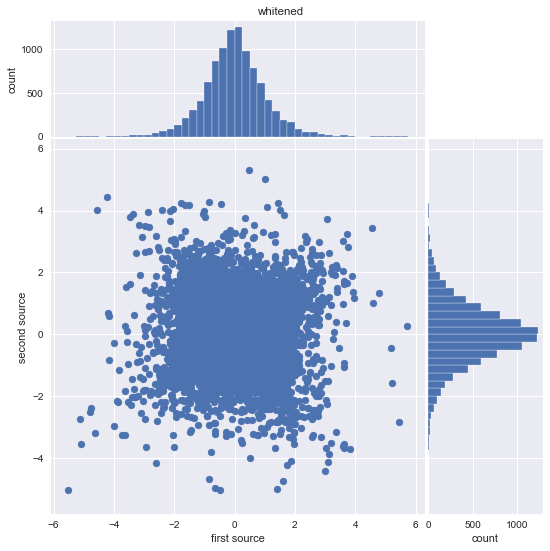

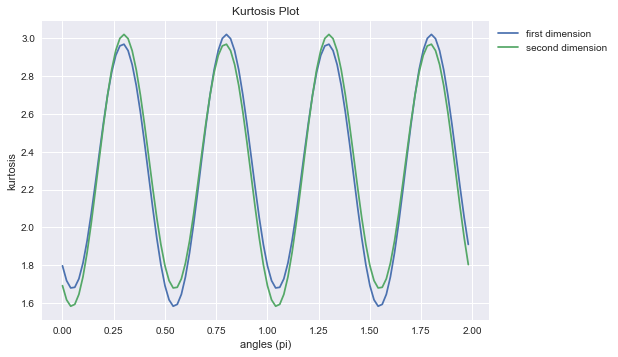

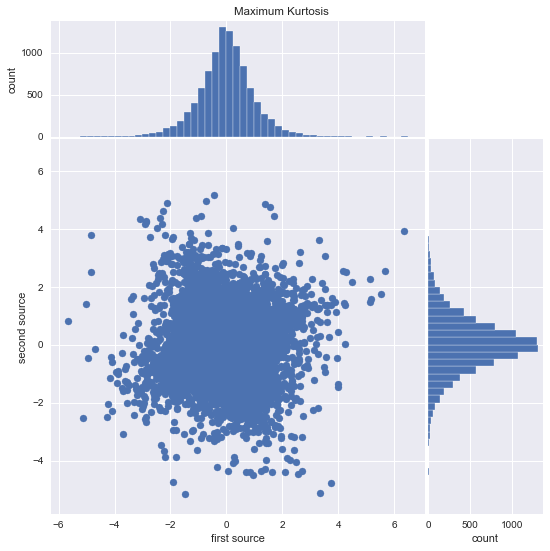

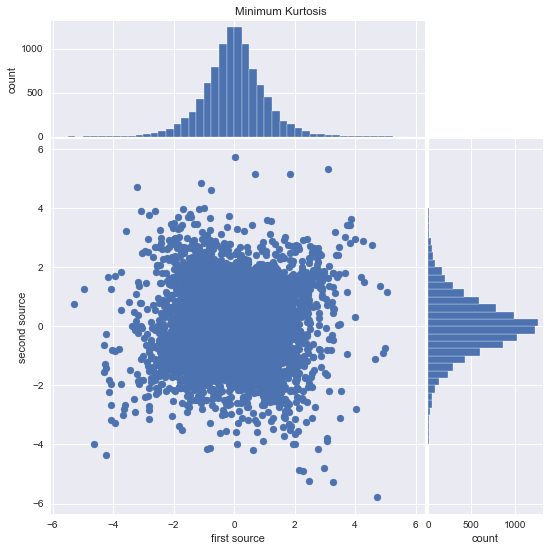

In [9]:
process(data_laplacian)

Discussion:

For normal distribution, rotating to the minimum kurtosis does not really changes the distribution. This happens because normal distribution has zero value of kurtosis. 

On the other hand, the uniform distribution has negative value of kurtosis. Rotating to the maximum kurtosis significantly changes the shape of the distribution. 

The same goes for laplacian distribution. The distribution has positive value of kurtosis. By choosing minimum kurtosis, the distribution gets more spreaded and  less skewed toward zero. 

Looking at the kurtosis value against rotation degree, choosing minimum kurtosis for rotation from one particular data feature on normally distributed data does not assure the minimum kurtosis for another data features. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da2a56d-1226-4296-b3df-ae254022a47b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>